In [1]:
import sys

sys.path.append("../src/")

In [2]:
import os
import pathlib
from collections import defaultdict
from typing import Any, Dict, Optional, Union

import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import xgboost
import lightgbm
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from rich.progress import track

%matplotlib inline


sns.set_style("darkgrid")
plt.style.use("seaborn-darkgrid")

pd.options.display.max_rows = 100
pd.options.display.max_columns = 500 

/tmp/ipykernel_11440/2641897458.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


In [6]:
model_dir = pathlib.Path("../data/upload/")

In [7]:
N_FOLD = 5

models_xgb = []
models_lgbm = []

for fold in range(N_FOLD):
    for level in range(1, 19):
        model = XGBClassifier()
        model.load_model(model_dir / f"model_xgb_fold_{fold}_level_{level}.json")
        models_xgb.append(model)

        model = lightgbm.Booster(
            model_file=str(model_dir / f"model_lgbm_fold_{fold}_level_{level}.txt")
        )
        models_lgbm.append(model)

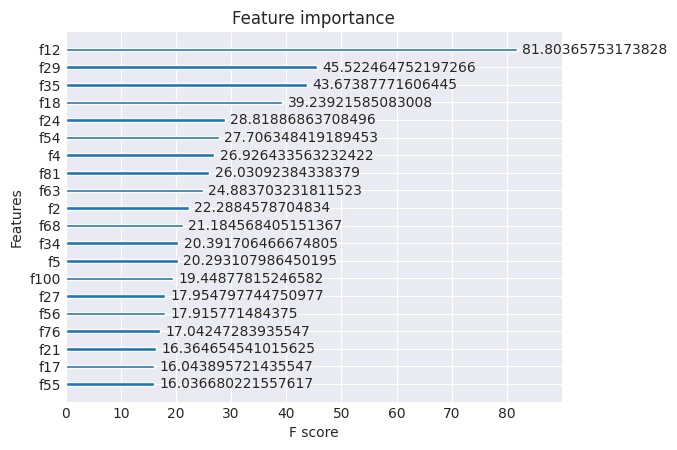

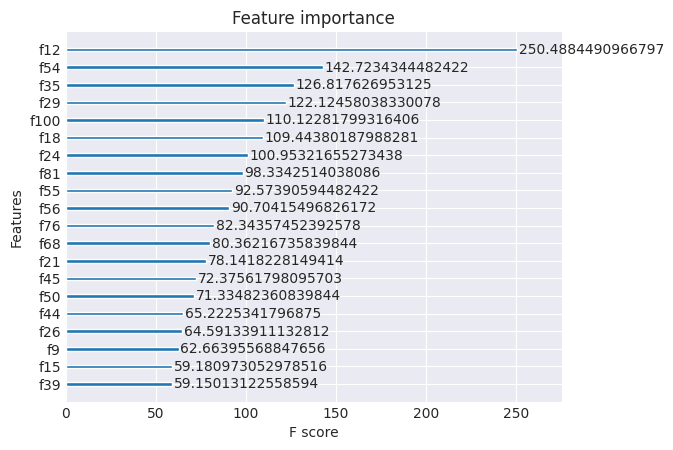

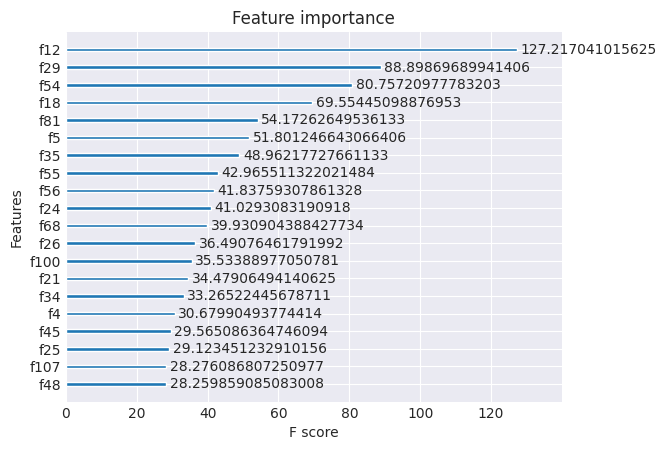

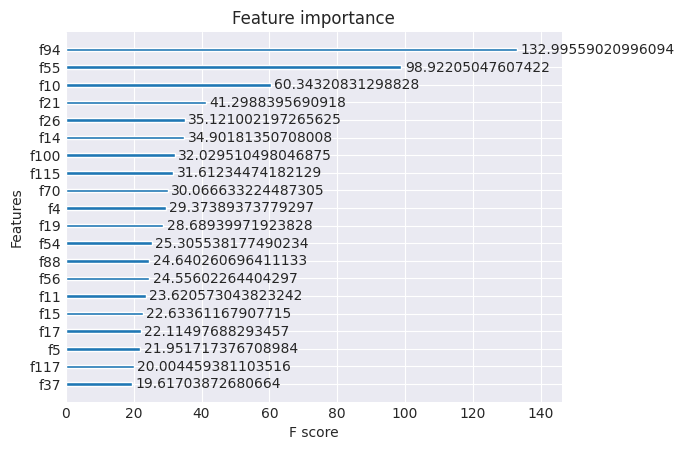

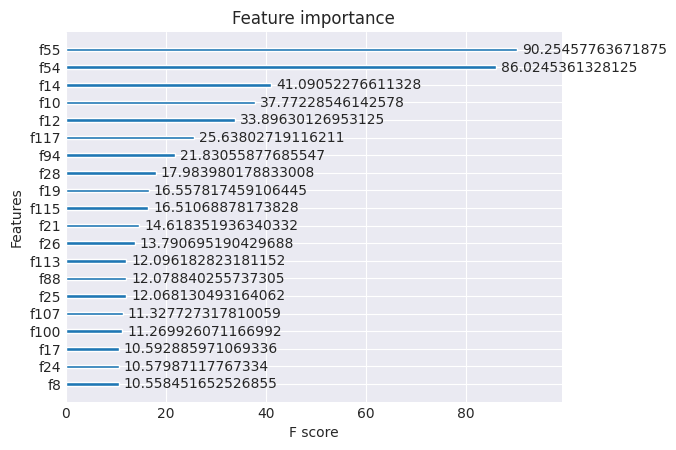

In [8]:
for i in range(N_FOLD):
    xgboost.plot_importance(models_xgb[i], max_num_features=20, importance_type="gain")

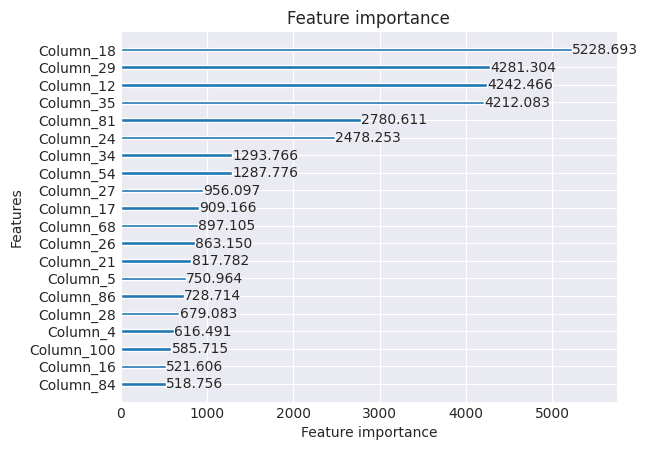

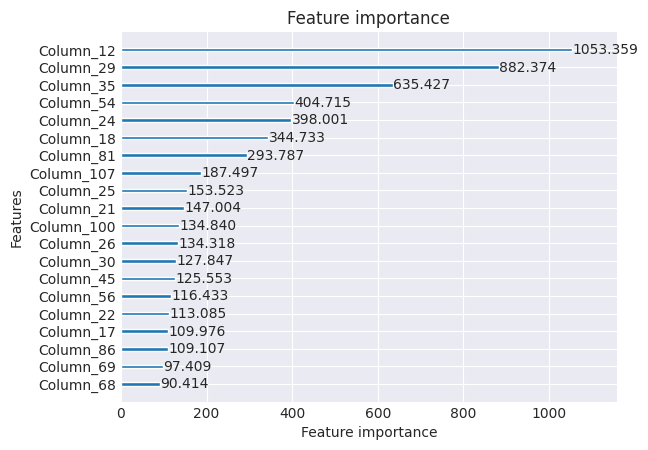

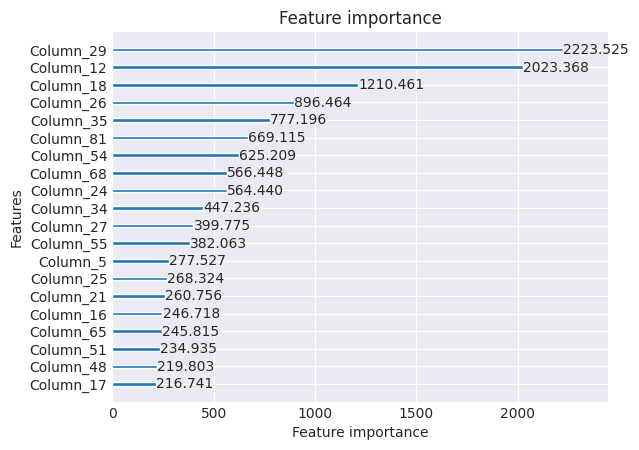

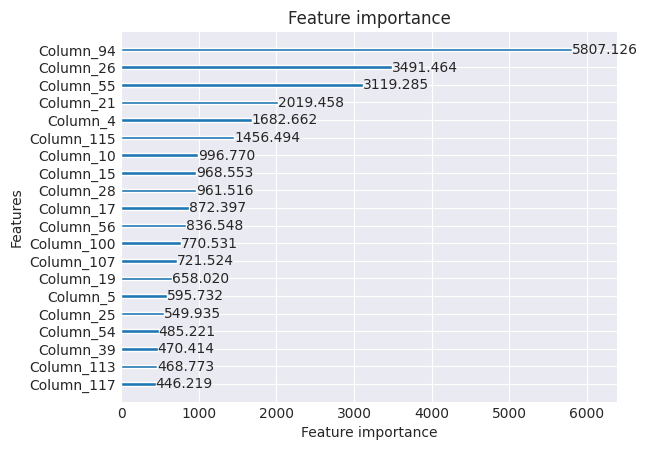

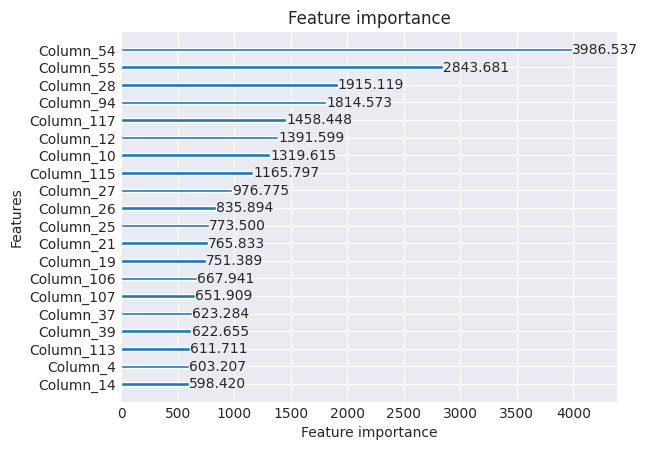

In [9]:
for i in range(N_FOLD):
    lightgbm.plot_importance(models_lgbm[i], max_num_features=20, importance_type="gain")